# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [71]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import plotgenerator as pg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [72]:
from inauguralproject import ExchangeEconomyClass

optimale allokeringer 

In [73]:
edgeworth = ExchangeEconomyClass()

def edgeworth_box(N):
    # Initialize lists to store x1A, x2A, x1B, and x2B
    x1A = [i / N for i in range(N + 1)]
    x2A = [i / N for i in range(N + 1)]
    x1B = [1 - x for x in x1A]
    x2B = [1 - x for x in x2A]

    # Calculate utility for initial endowments
    uA_initial = edgeworth.utility_A(edgeworth.par.w1A, edgeworth.par.w2A)
    print('uA_initial', uA_initial)
    uB_initial = edgeworth.utility_B((1-edgeworth.par.w1A), (1-edgeworth.par.w2A))
    print('uB_initial', uB_initial)

    # Lists to store x1A_val and x2A_val when condition is satisfied
    x1A_opt_1 = []
    x2A_opt_1 = []

    # Iterate over all combinations of x1A and x2A
    for x1A_val in x1A:
        for x2A_val in x2A:
            # Calculate utility for current allocation
            uA_current = edgeworth.utility_A(x1A_val, x2A_val)
            uB_current = edgeworth.utility_B(1-x1A_val, 1-x2A_val)
            
            # Check if current utility is greater than or equal to initial utility
            if uA_current >= uA_initial and uB_current >= uB_initial:
                x1A_opt_1.append(x1A_val)
                x2A_opt_1.append(x2A_val)

    # Return the lists of efficient allocations
    return x1A_opt_1, x2A_opt_1

# Call the function with N value
x1A_opt_1, x2A_opt_1 = edgeworth_box(N=75)
#print("x1A_opt:", x1A_opt)
#print("x2A_opt:", x2A_opt)

uA_initial 0.41601676461038084
uB_initial 0.30365889718756617


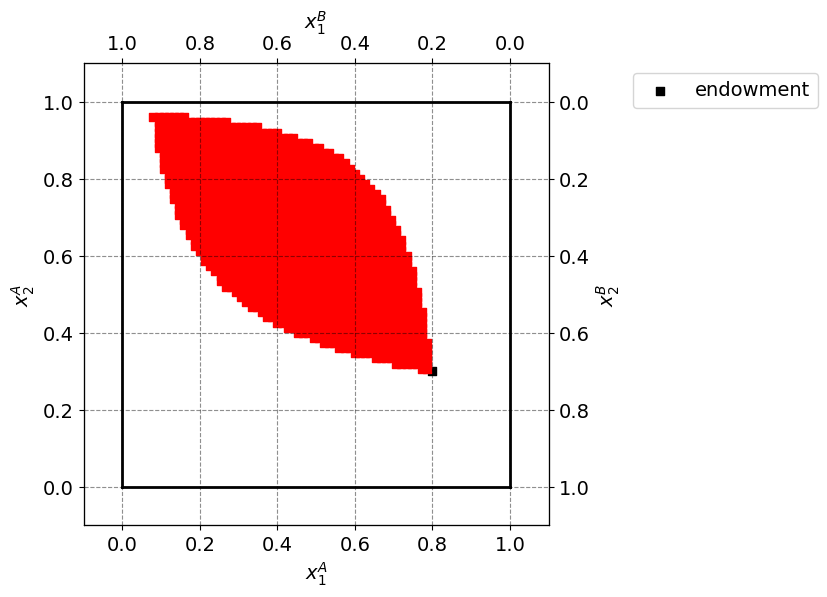

In [74]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

ax_A.scatter(x1A_opt_1,x2A_opt_1,marker='s',color='red',label='endowment')

# Question 2

eps givet forskellige priser



In [75]:
clearing_market_error = ExchangeEconomyClass()

def error_clearing(N):
    # Initialize lists to store p1, eps1, and eps2
    p1_values = [0.5 + 2*(i / N) for i in range(N)]
    eps1_values = []
    eps2_values = []

    # Iterate over all combinations of p1
    for p1_val in p1_values:
        eps1, eps2 = clearing_market_error.check_market_clearing(p1_val)
        eps1_values.append(eps1)
        eps2_values.append(eps2)

    return p1_values, eps1_values, eps2_values

# Call the function with N value and capture the returned values
p1_values, eps1_values, eps2_values = error_clearing(N=75)

# Print the results
#for p1_val, eps1_val, eps2_val in zip(p1_values, eps1_values, eps2_values):
#    print(f"p1: {p1_val:5.3f}, eps1: {eps1_val:5.3f}, eps2: {eps2_val:5.3f}")

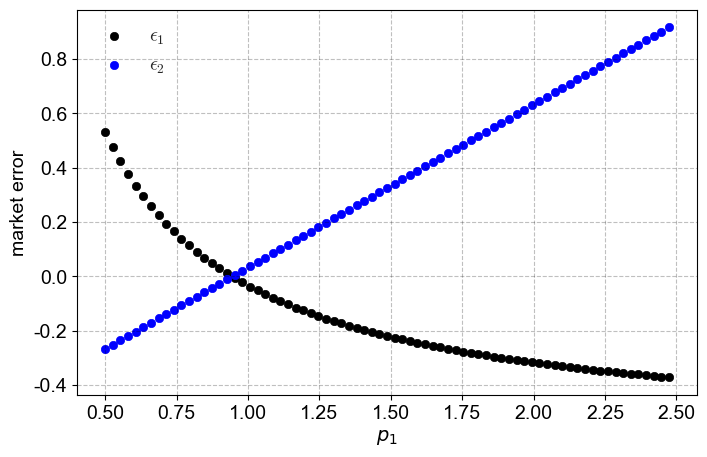

In [76]:
fig = pg.PlotFigure(figsize=(8,5),fontname=None)
fig.add_plot(x=p1_values,y=eps1_values,marker='o',color='black',label='$\epsilon_1$',xlabel=f"$p_1$",ylabel=f"market error")
fig.add_plot(x=p1_values,y=eps2_values,marker='o',color='blue',label='$\epsilon_2$',xlabel=f"$p_1$",ylabel=f"market error")
fig.add_legend()
fig.set_number_format('y','{x:,.1f}')
fig.show()

# Question 3

Explain your code and procedure

In [77]:
clear_market = ExchangeEconomyClass()

In [78]:
# code

clear_market = ExchangeEconomyClass()

p1_guess = 0.1    # 0.94444
clear_market.find_equilibrium(p1_guess)


  0: p1=  0.10000000 -> exess demand ->     5.06666667
  1: p1=  2.63333333 -> exess demand ->    -0.38481013
  2: p1=  2.44092827 -> exess demand ->    -0.36784788
  3: p1=  2.25700433 -> exess demand ->    -0.34892974
  4: p1=  2.08253946 -> exess demand ->    -0.32789631
     ...
 25: p1=  0.94634325 -> exess demand ->    -0.00120388
 50: p1=  0.94444458 -> exess demand ->    -0.00000009
 56: p1=  0.94444446 -> exess demand ->    -0.00000001


In [79]:
clear_market.print_solution()


solution to market equilibrium:
p1 = 0.944
p2 = 1
excess demand are:
z1 = -8.650000049570394e-09
z2= 8.169444454253494e-09


In [80]:
x1a_3, x2a_3 = clear_market.demand_A(0.944)
x1b_3, x2_b_3 = clear_market.demand_B(0.944)

ADD CONCISE CONLUSION.

# Question 4

**a** 

In [81]:
clear_market.find_best_choice_test(N=75)
x1_best,x2_best,u_best,p1 = clear_market.find_best_choice_test(N=75)

x1A_4a = x1_best
x2A_4a = x2_best

print('The optimal price of A:', clear_market.find_best_choice_test(N=75)[3])
print('The allocation becomes: x1a=', x1_best,'x2a =', x2_best, 'and A´s utility becomes:', u_best)

The optimal price of A: 1.8866666666666667
The allocation becomes: x1a= 0.619316843345112 x2a = 0.6408888888888888 and A´s utility becomes: 0.633615985237553


**b**

In [82]:
x1A, x2A, uA, optimal_p1 = clear_market.find_best_choice_any_price()

x1A_4b = x1A
x2A_4b = x2A

print(f"Optimal price p1: {optimal_p1}")
print(f"Optimal allocations for A: x1A = {x1A}, x2A = {x2A}")
print(f"Utility of A: {uA}")

Optimal price p1: 1.89934601087839
Optimal allocations for A: x1A = 0.6209680609392946, x2A = 0.6400435992747739
Utility of A: 0.6336208506936586


# Question 5

**a** 

In [83]:
clear_market.opgave_5_A()

u_A_opt, x1A_opt, x2A_opt = clear_market.opgave_5_A()

x1A_5a = x1A_opt
x2A_5a = x2A_opt

print("u_A_opt:", u_A_opt)
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt) 

u_A_opt: 0.7415523509091093
the optimal x1A for A is: 0.56
the optimal x2A for A is: 0.8533333333333334


**b**

In [84]:
u_A_opt, x1A_opt, x2A_opt = clear_market.opgave_5_B_solver()

x1A_5b = x1A_opt
x2A_5b = x2A_opt

print("u_A_opt:", u_A_opt)
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt)

u_A_opt: 0.743227607900958
the optimal x1A for A is: 0.5757450976346095
the optimal x2A for A is: 0.844437722966242


# Question 6

**a** 

In [85]:
clear_market.opgave_6_A()

x1A_opt, x2A_opt = clear_market.opgave_6_A()
print("the optimal x1A for A is:", x1A_opt)
print("the optimal x2A for A is:", x2A_opt) 

the optimal x1A for A is: 0.33326665333066613
the optimal x2A for A is: 0.6665333066613323


**B** 

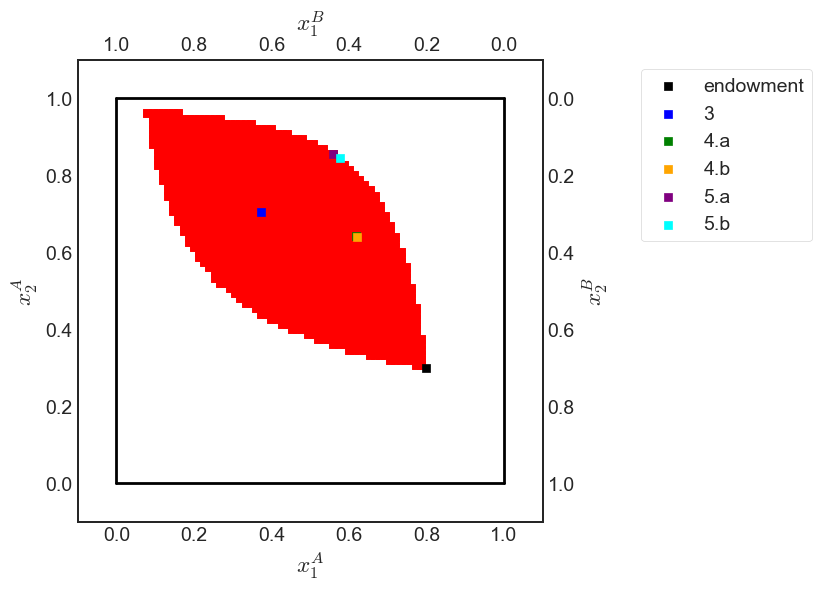

In [86]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(x1A_opt_1, x2A_opt_1, marker='s', color='red', zorder=1)

# Plot other scatter plots with higher zorder (they will appear above 'endowment')
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment', zorder=2)
ax_A.scatter(x1a_3, x2a_3, marker='s', color='blue', label='3', zorder=3)
ax_A.scatter(x1A_4a, x2A_4a, marker='s', color='green', label='4.a', zorder=4)
ax_A.scatter(x1A_4b, x2A_4b, marker='s', color='orange', label='4.b', zorder=5)
ax_A.scatter(x1A_5a, x2A_5a, marker='s', color='purple', label='5.a', zorder=6)
ax_A.scatter(x1A_5b, x2A_5b, marker='s', color='cyan', label='5.b', zorder=7)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

ax_A.scatter(x1A_opt_1,x2A_opt_1,marker='s',color='red',label='endowment')

# Question 7

**a** 

In [87]:
import random

# Define the number of draws
num_draws = 50

# Initialize lists to store the values of w1A and w2A
w1A_values = []
w2A_values = []

# Draw values for w1A and w2A and store them in the lists
for _ in range(num_draws):
    w1A_values.append(random.uniform(0, 1))
    w2A_values.append(random.uniform(0, 1))

print(w1A_values)
print(w2A_values)
# Define the list of vectors W
W_values = [(w1A_values[i], w2A_values[i]) for i in range(num_draws)]

# Print the list of vectors W
#print("W values:")
#for i, W in enumerate(W_values):
#    print(f"W[{i+1}] =", W)

[0.7459911317321593, 0.07797966407270829, 0.39185010214450144, 0.9181786302998383, 0.27216736248188445, 0.6679590855405753, 0.6056242567772189, 0.8465290786132297, 0.8535803944243031, 0.19697483917273806, 0.9590519273495032, 0.1428781481657978, 0.9172604422804223, 0.61415650422503, 0.6958110634658033, 0.5221452412115449, 0.8254861619696386, 0.17374801269061968, 0.6057229071596406, 0.08816277036425413, 0.5533992848619464, 0.720579502592876, 0.3474431500519566, 0.08352256393537372, 0.256922987992527, 0.8558389245356205, 0.8367539887452244, 0.06469447404839701, 0.3901277714482051, 0.3269364793599694, 0.6165933098778055, 0.9544124460982956, 0.8485271604236176, 0.300698064737692, 0.6895617036627176, 0.07628253874599578, 0.5348071743682258, 0.14212957644517954, 0.4924211355117102, 0.7293704482790678, 0.1870496935647984, 0.806429243023257, 0.22133479708323422, 0.20790079742048062, 0.009685961444148683, 0.8525261586477458, 0.32316722480211924, 0.5179766002181156, 0.7554788824366312, 0.23828953

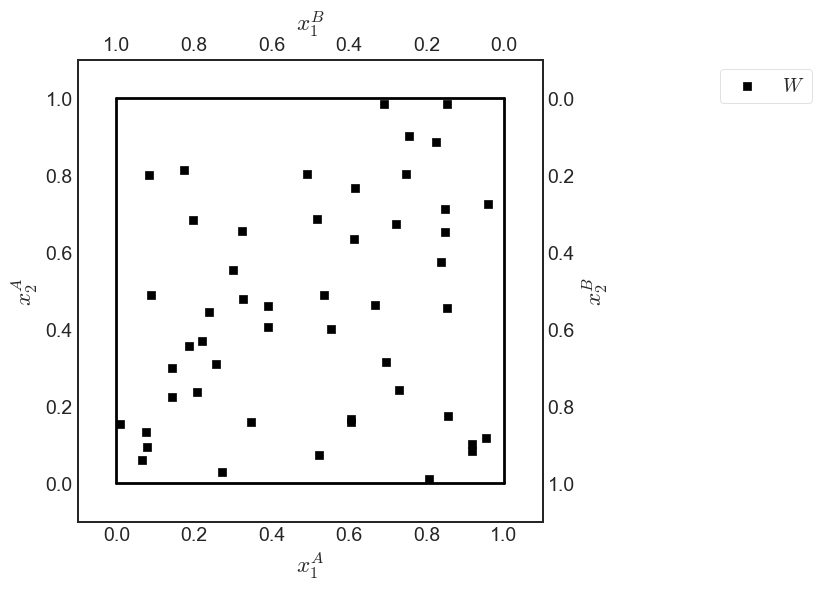

In [88]:
model = ExchangeEconomyClass()

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot other scatter plots with higher zorder (they will appear above 'endowment')
ax_A.scatter(w1A_values, w2A_values, marker='s', color='black', label='$W$', zorder=2)


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


# Question 8

**a** 

In [91]:
# Define a range of prices to check
price_range = [i * 0.00001 for i in range(1, 400000)]  # from 0.01 to 1.99

# Loop over all endowments
for i, (w1A, w2A) in enumerate(W_values):
    economy = ExchangeEconomyClass()
    economy.par.w1A = w1A
    economy.par.w2A = w2A

    # Find the best price
    best_price, min_excess_demand = economy.find_best_price(price_range)

    eps1, eps2 = economy.check_market_clearing(best_price)
    excess_demand = economy.excess_demand_x1(best_price)
    # Get allocations
    x1A, x2A = economy.demand_A(best_price)
    x1B, x2B = economy.demand_B(best_price)

    print(f"Endowment {i+1}: w1A={w1A}, w2A={w2A}")
    print(f"Best Price: {best_price}")
    print(f"Market Clearing Check: eps1={eps1}, eps2={eps2}")
    print(f"Excess Demand x1: {excess_demand}")
    print(f"Minimum Excess Demand: {min_excess_demand}")
    print(f"Allocations: x1A={x1A}, x2A={x2A}, x1B={x1B}, x2B={x2B}\n")
#else:
#    print(f"Endowment {i+1}: w1A={w1A}, w2A={w2A}")
#    print("No equilibrium price found within the given range.\n")

Endowment 1: w1A=0.7459911317321593, w2A=0.8026460026875547
Best Price: 0.6857700000000001
Market Clearing Check: eps1=2.7506328564852467e-06, eps2=-1.8863014939474176e-06
Excess Demand x1: 2.750632856596269e-06
Minimum Excess Demand: 4.636934350432664e-06
Allocations: x1A=0.6388071516181408, x2A=0.8761495607303452, x1B=0.36119559901471565, x2B=0.12384855296816083

Endowment 2: w1A=0.07797966407270829, w2A=0.09235449579767874
Best Price: 1.7696500000000002
Market Clearing Check: eps1=-2.2760130480303786e-07, eps2=4.027746491885864e-07
Excess Demand x1: -2.2760130491406017e-07
Minimum Excess Demand: 6.303759539916243e-07
Allocations: x1A=0.04338922165851006, x2A=0.15356747221596467, x1B=0.9566105507401851, x2B=0.8464329305586845

Endowment 3: w1A=0.39185010214450144, w2A=0.45868217784726195
Best Price: 1.10739
Market Clearing Check: eps1=-9.218255122567243e-07, eps2=1.0208203539141536e-06
Excess Demand x1: -9.218255122567243e-07
Minimum Excess Demand: 1.942645866170878e-06
Allocations: 

In [90]:
# code

clear_market = ExchangeEconomyClass()

p1_guess = 0.1    # 0.94444
clear_market.find_equilibrium_8(p1_guess)

AttributeError: 'ExchangeEconomyClass' object has no attribute 'find_equilibrium_8'

In [ ]:
clear_market.print_solution_8()

In [ ]:
import inauguralproject_opg_7

In [ ]:
from inauguralproject_opg_7 import ExchangeEconomyClass_opg_7

In [ ]:
opgave_7 = ExchangeEconomyClass_opg_7()

p1_guess = 0.01    # 0.94444
opgave_7.find_equilibrium_test_1(p1_guess)

In [ ]:
opgave_7.print_solution()